### STOCK MARKET DATA SCRAPPING BY  API KEY

In [1]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
import os

In [7]:
api_key  = os.getenv("API_KEY")

# Search symbol

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"godrej","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": "7dd9fac50dmshac6c38af66d8473p18f43ajsnd7d57333f652",
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data  =  response.json() 

In [11]:
type(data)

dict

In [12]:
data.keys()

dict_keys(['bestMatches'])

In [14]:
data['bestMatches']

[{'1. symbol': 'GODREJCP.BSE',
  '2. name': 'GODREJ CONSUMER PRODUCTS LTD.',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '0.7059'},
 {'1. symbol': 'GODREJIND.BSE',
  '2. name': 'GODREJ INDUSTRIES LTD.',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '0.6667'},
 {'1. symbol': 'GODREJAGRO.BSE',
  '2. name': 'Godrej Agrovet Ltd',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '0.6316'},
 {'1. symbol': 'GODREJPROP.BSE',
  '2. name': 'Godrej Properties Ltd',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5

In [17]:
type(data['bestMatches'])
data['bestMatches'][0]['1. symbol']

'GODREJCP.BSE'

In [19]:
for  i  in data['bestMatches']:
    print(i['1. symbol'])

GODREJCP.BSE
GODREJIND.BSE
GODREJAGRO.BSE
GODREJPROP.BSE
540743.BSE
532424.BSE


In [20]:
dict1 =  {}
for  i  in  data['bestMatches']:
    symbols  =  i['1. symbol']
    dict1[symbols] = [i['2. name'] ,  i['4. region'] , i['8. currency']]


In [21]:
dict1

{'GODREJCP.BSE': ['GODREJ CONSUMER PRODUCTS LTD.', 'India/Bombay', 'INR'],
 'GODREJIND.BSE': ['GODREJ INDUSTRIES LTD.', 'India/Bombay', 'INR'],
 'GODREJAGRO.BSE': ['Godrej Agrovet Ltd', 'India/Bombay', 'INR'],
 'GODREJPROP.BSE': ['Godrej Properties Ltd', 'India/Bombay', 'INR'],
 '540743.BSE': ['Godrej Agrovet Limited', 'India/Bombay', 'INR'],
 '532424.BSE': ['Godrej Consumer Products Limited', 'India/Bombay', 'INR']}

In [ ]:
# 

# scrap data for daily time series

In [22]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":'540743.BSE',"outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": "7dd9fac50dmshac6c38af66d8473p18f43ajsnd7d57333f652",
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data1  = response.json()

In [23]:
data1

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': '540743.BSE',
  '3. Last Refreshed': '2025-07-23',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-07-23': {'1. open': '793.3500',
   '2. high': '853.1000',
   '3. low': '793.3500',
   '4. close': '848.7000',
   '5. volume': '75270'},
  '2025-07-22': {'1. open': '803.0500',
   '2. high': '816.7500',
   '3. low': '799.5500',
   '4. close': '810.0000',
   '5. volume': '19280'},
  '2025-07-21': {'1. open': '809.9500',
   '2. high': '811.1500',
   '3. low': '795.0000',
   '4. close': '806.7000',
   '5. volume': '13098'},
  '2025-07-18': {'1. open': '790.6000',
   '2. high': '816.9500',
   '3. low': '784.4500',
   '4. close': '801.2000',
   '5. volume': '36309'},
  '2025-07-17': {'1. open': '778.7500',
   '2. high': '795.0000',
   '3. low': '778.7000',
   '4. close': '787.8500',
   '5. volume': '384993'},
  '2025-07-16': {'1. open': '770.9500',


In [24]:
type(data1)

dict

In [25]:
data1.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [29]:
df1  =  data1['Time Series (Daily)']
df1

{'2025-07-23': {'1. open': '793.3500',
  '2. high': '853.1000',
  '3. low': '793.3500',
  '4. close': '848.7000',
  '5. volume': '75270'},
 '2025-07-22': {'1. open': '803.0500',
  '2. high': '816.7500',
  '3. low': '799.5500',
  '4. close': '810.0000',
  '5. volume': '19280'},
 '2025-07-21': {'1. open': '809.9500',
  '2. high': '811.1500',
  '3. low': '795.0000',
  '4. close': '806.7000',
  '5. volume': '13098'},
 '2025-07-18': {'1. open': '790.6000',
  '2. high': '816.9500',
  '3. low': '784.4500',
  '4. close': '801.2000',
  '5. volume': '36309'},
 '2025-07-17': {'1. open': '778.7500',
  '2. high': '795.0000',
  '3. low': '778.7000',
  '4. close': '787.8500',
  '5. volume': '384993'},
 '2025-07-16': {'1. open': '770.9500',
  '2. high': '784.2500',
  '3. low': '770.9500',
  '4. close': '777.2500',
  '5. volume': '6938'},
 '2025-07-15': {'1. open': '761.1000',
  '2. high': '786.0000',
  '3. low': '761.1000',
  '4. close': '774.7500',
  '5. volume': '4193'},
 '2025-07-14': {'1. open': '

In [27]:
import pandas as pd

In [32]:
df  =  pd.DataFrame(df1)

In [34]:
df =  df.T

In [35]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-07-23,793.3500,853.1000,793.3500,848.7000,75270
2025-07-22,803.0500,816.7500,799.5500,810.0000,19280
2025-07-21,809.9500,811.1500,795.0000,806.7000,13098
2025-07-18,790.6000,816.9500,784.4500,801.2000,36309
2025-07-17,778.7500,795.0000,778.7000,787.8500,384993
...,...,...,...,...,...
2025-03-04,720.0000,748.8500,711.5000,739.4000,12840
2025-03-03,709.0500,750.4500,709.0500,719.7500,20506
2025-02-28,718.7500,743.1500,710.0000,714.4000,14657
2025-02-27,749.9500,752.5500,732.8500,736.7000,3999


In [36]:
# check  data type

In [38]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [39]:
# convert in float
df = df.astype('float')

In [40]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [41]:
df.index

Index(['2025-07-23', '2025-07-22', '2025-07-21', '2025-07-18', '2025-07-17',
       '2025-07-16', '2025-07-15', '2025-07-14', '2025-07-11', '2025-07-10',
       '2025-07-09', '2025-07-08', '2025-07-07', '2025-07-04', '2025-07-03',
       '2025-07-02', '2025-07-01', '2025-06-30', '2025-06-27', '2025-06-26',
       '2025-06-25', '2025-06-24', '2025-06-23', '2025-06-20', '2025-06-19',
       '2025-06-18', '2025-06-17', '2025-06-16', '2025-06-13', '2025-06-12',
       '2025-06-11', '2025-06-10', '2025-06-09', '2025-06-06', '2025-06-05',
       '2025-06-04', '2025-06-03', '2025-06-02', '2025-05-30', '2025-05-29',
       '2025-05-28', '2025-05-27', '2025-05-26', '2025-05-23', '2025-05-22',
       '2025-05-21', '2025-05-20', '2025-05-19', '2025-05-16', '2025-05-15',
       '2025-05-14', '2025-05-13', '2025-05-12', '2025-05-09', '2025-05-08',
       '2025-05-07', '2025-05-06', '2025-05-05', '2025-05-02', '2025-04-30',
       '2025-04-29', '2025-04-28', '2025-04-25', '2025-04-24', '2025-04-23',

In [42]:
# convert index in date format
df.index  = pd.to_datetime(df.index)

In [43]:
df.index

DatetimeIndex(['2025-07-23', '2025-07-22', '2025-07-21', '2025-07-18',
               '2025-07-17', '2025-07-16', '2025-07-15', '2025-07-14',
               '2025-07-11', '2025-07-10', '2025-07-09', '2025-07-08',
               '2025-07-07', '2025-07-04', '2025-07-03', '2025-07-02',
               '2025-07-01', '2025-06-30', '2025-06-27', '2025-06-26',
               '2025-06-25', '2025-06-24', '2025-06-23', '2025-06-20',
               '2025-06-19', '2025-06-18', '2025-06-17', '2025-06-16',
               '2025-06-13', '2025-06-12', '2025-06-11', '2025-06-10',
               '2025-06-09', '2025-06-06', '2025-06-05', '2025-06-04',
               '2025-06-03', '2025-06-02', '2025-05-30', '2025-05-29',
               '2025-05-28', '2025-05-27', '2025-05-26', '2025-05-23',
               '2025-05-22', '2025-05-21', '2025-05-20', '2025-05-19',
               '2025-05-16', '2025-05-15', '2025-05-14', '2025-05-13',
               '2025-05-12', '2025-05-09', '2025-05-08', '2025-05-07',
      

In [44]:
# give name to index column

In [45]:
df.index.name  =  "Date"

In [46]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-07-23,793.35,853.10,793.35,848.70,75270.0
2025-07-22,803.05,816.75,799.55,810.00,19280.0
2025-07-21,809.95,811.15,795.00,806.70,13098.0
2025-07-18,790.60,816.95,784.45,801.20,36309.0
2025-07-17,778.75,795.00,778.70,787.85,384993.0


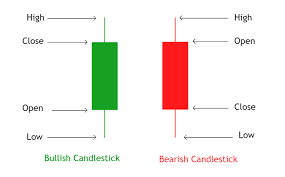

In [47]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [50]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [49]:
import plotly.graph_objects  as go

In [51]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['1. open'],
                high=df['2. high'],
                low=df['3. low'],
                close=df['4. close'])])


fig.update_layout(title= "Candelstick_chart" ,  xaxis_title  ="Date" , yaxis_title  = "Shares")